<b>Tasks:</b>
Implement full-fledged work in the field of classical machine learning with implementation:
- Constraction graphics;
- Calculation a correlation matrix;
- Drop emissions;
- Normalization;
- Balancing classes;
- Reducing amount of fetaures;
- Searching parameters for model;
- Stacking;
- Constraction a confusion matrix;

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset description
1. TItle: Flag database

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
   3. zone	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW
   4. area	in thousands of square km
   5. population	in round millions
   6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 
               Indo-European, 7=Chinese, 8=Arabic, 
               9=Japanese/Turkish/Finnish/Magyar, 10=Others
   7. religion (target) 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
   8. bars     Number of vertical bars in the flag
   9. stripes  Number of horizontal stripes in the flag
  10. colours  Number of different colours in the flag
  11. red      0 if red absent, 1 if red present in the flag
  12. green    same for green
  13. blue     same for blue
  14. gold     same for gold (also yellow)
  15. white    same for white
  16. black    same for black
  17. orange   same for orange (also brown)
  18. mainhue  predominant colour in the flag (tie-breaks decided by taking
               the topmost hue, if that fails then the most central hue,
               and if that fails the leftmost hue)
  19. circles  Number of circles in the flag
  20. crosses  Number of (upright) crosses
  21. saltires Number of diagonal crosses
  22. quarters Number of quartered sections
  23. sunstars Number of sun or star symbols
  24. crescent 1 if a crescent moon symbol present, else 0
  25. triangle 1 if any triangles present, 0 otherwise
  26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)
               present, 0 otherwise
  28. text     1 if any letters or writing on the flag (e.g., a motto or
               slogan), 0 otherwise
  29. topleft  colour in the top-left corner (moving right to decide 
               tie-breaks)
  30. botright Colour in the bottom-left corner (moving left to decide 
               tie-breaks)

8. Missing values: None

In [3]:
#Step 1. Load and describing data
columns = ['Name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
df = pd.read_csv('datasets_features/flag_data.csv', names=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [4]:
df.head()

,Name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [5]:
df.select_dtypes('object').columns 

Index(['Name', 'mainhue', 'topleft', 'botright'], dtype='object')

In [6]:
df = pd.get_dummies(df, columns=['mainhue', 'topleft', 'botright'] , dtype=int)
df.head()

,Name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,0,0,0,0,1,0,0,0
1,Albania,3,1,29,3,6,6,0,0,3,...,1,0,0,0,0,0,0,0,1,0
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,0,0,0,0,0,0,0,1
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,0,0,0,0,1,0
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.288660,0.211340,0.046392,0.242268,0.010309,0.046392,0.206186,0.005155,0.355670,0.087629
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.454312,0.409315,0.210876,0.429564,0.101271,0.210876,0.405612,0.071796,0.479954,0.283486
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Step 2. Data eximining
# 2.1. Checking NULL values
df.isna().sum()

Name               0
landmass           0
zone               0
area               0
population         0
language           0
religion           0
bars               0
stripes            0
colours            0
red                0
green              0
blue               0
gold               0
white              0
black              0
orange             0
circles            0
crosses            0
saltires           0
quarters           0
sunstars           0
crescent           0
triangle           0
icon               0
animate            0
text               0
mainhue_black      0
mainhue_blue       0
mainhue_brown      0
mainhue_gold       0
mainhue_green      0
mainhue_orange     0
mainhue_red        0
mainhue_white      0
topleft_black      0
topleft_blue       0
topleft_gold       0
topleft_green      0
topleft_orange     0
topleft_red        0
topleft_white      0
botright_black     0
botright_blue      0
botright_brown     0
botright_gold      0
botright_green     0
botright_oran

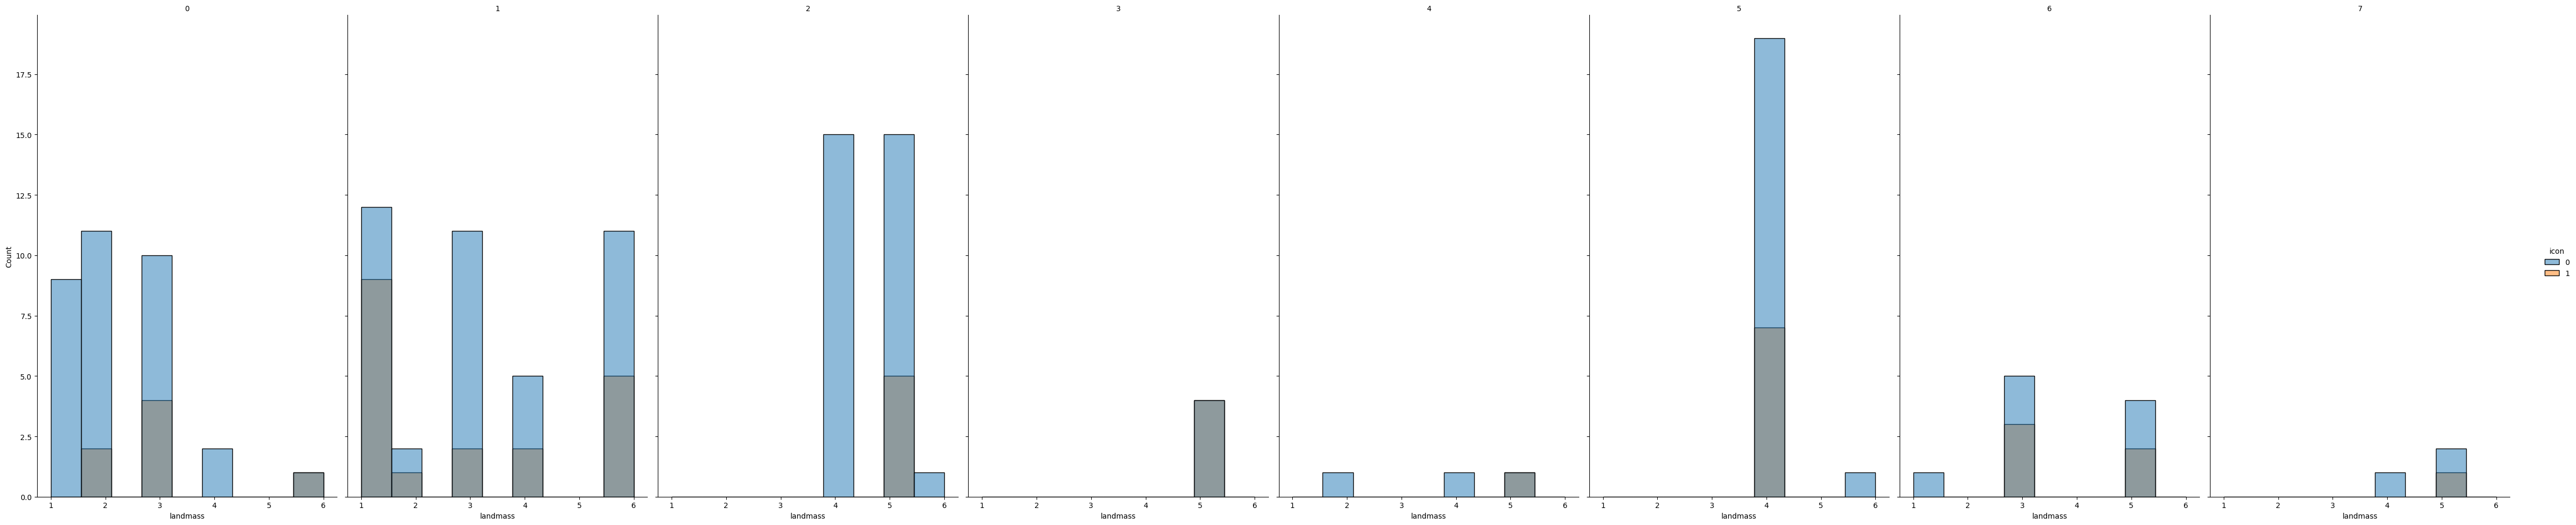

In [9]:
# 2.2. Graphics 
g = sns.displot(
    data=df, x="landmass", hue="icon", col='religion',
    kind="hist", height=10, aspect=.6,
)
g.set_axis_labels("landmass")
g.set_titles("{col_name}")

<b>Some concusions:</b>
- Religion <b>Muslim(2)</b> is in landmass <b>Africa, Asia, Oceania(4,5,6)</b> and have <b>the high frequency</b> in <b>Africa, Asia(4,5)</b>
- Religion <b>Catholic, Other Christian(0,1)</b> have <b>the high frequency</b> and aren't in landmass <b>Asia(5) </b>
- Religion <b>Buddhist(3)</b> is only in landmass <b>Asia(5)</b> (and flag is always with icon)
- Religion <b>Ethnic(5)</b> is popular in landmass <b>Africa(4)</b> and there is <b>icon in flags</b>
- An icon has every religion in every lanmass with the same popularity.

<Axes: xlabel='religion', ylabel='crosses'>

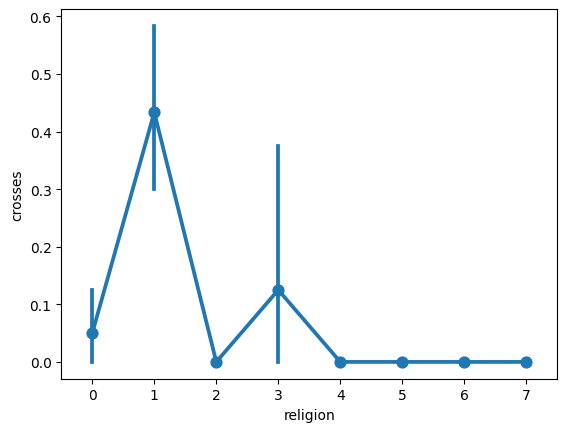

In [10]:
sns.pointplot(data=df, y='crosses', x='religion')
#crosses are more likely for Other Christian(1) and absolutely aren't likely for Africa, Asia, Oceania, Others(4, 5, 6, 7)

<Axes: xlabel='religion', ylabel='saltires'>

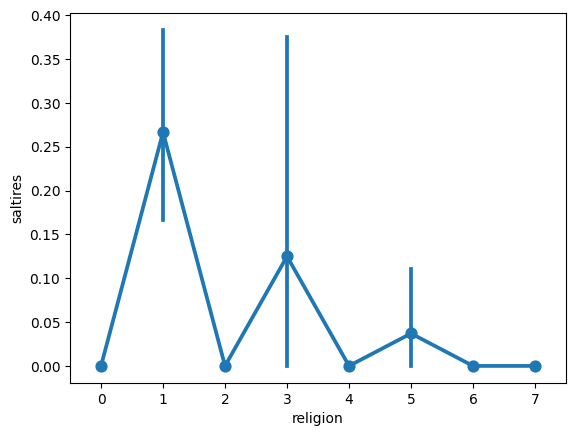

In [11]:
sns.pointplot(data=df, y='saltires', x='religion')
#saltires (Number of diagonal crosses) are more likely for Other Christian(1) and sometimes likely for Buddhist(3)  and Ethnic (5).

<Axes: xlabel='religion', ylabel='white'>

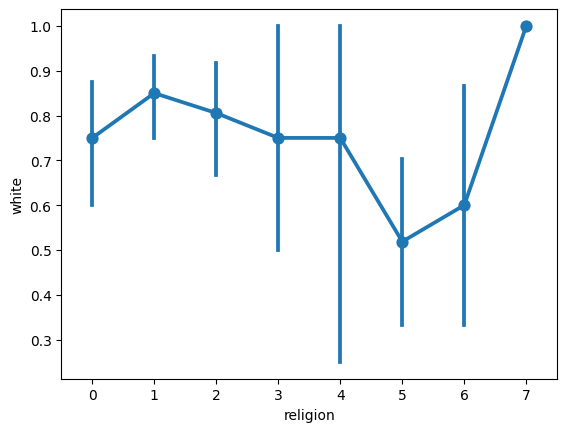

In [12]:
sns.pointplot(data=df, y='white', x='religion')
# Color white for Others(7) everytime.

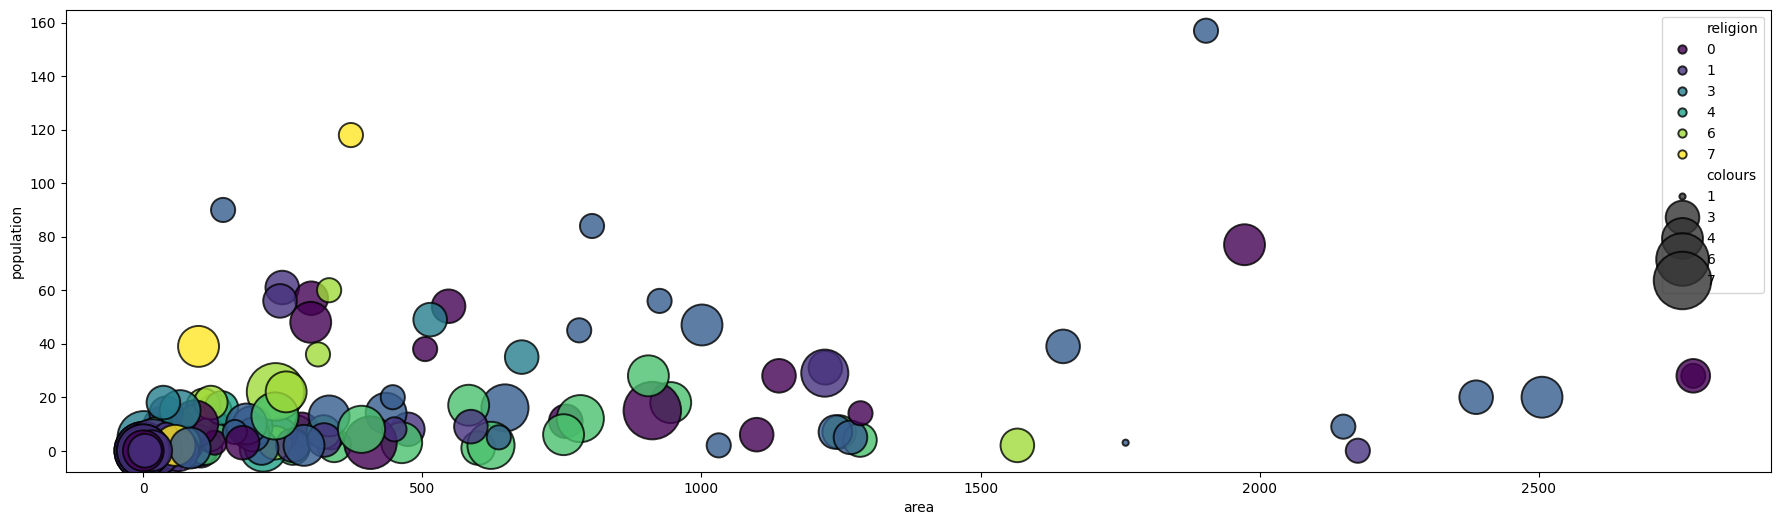

In [13]:
# Bubble plot
df_bubble = df[(df.area <= 4000) & (df.population <= 200)]
plt.rcParams['figure.figsize'] = [22, 6]
sns.scatterplot(data=df_bubble, x="area", y="population", size="colours", hue="religion", sizes=(20, 2000), palette="viridis", edgecolors="black", alpha=0.8)

plt.show()

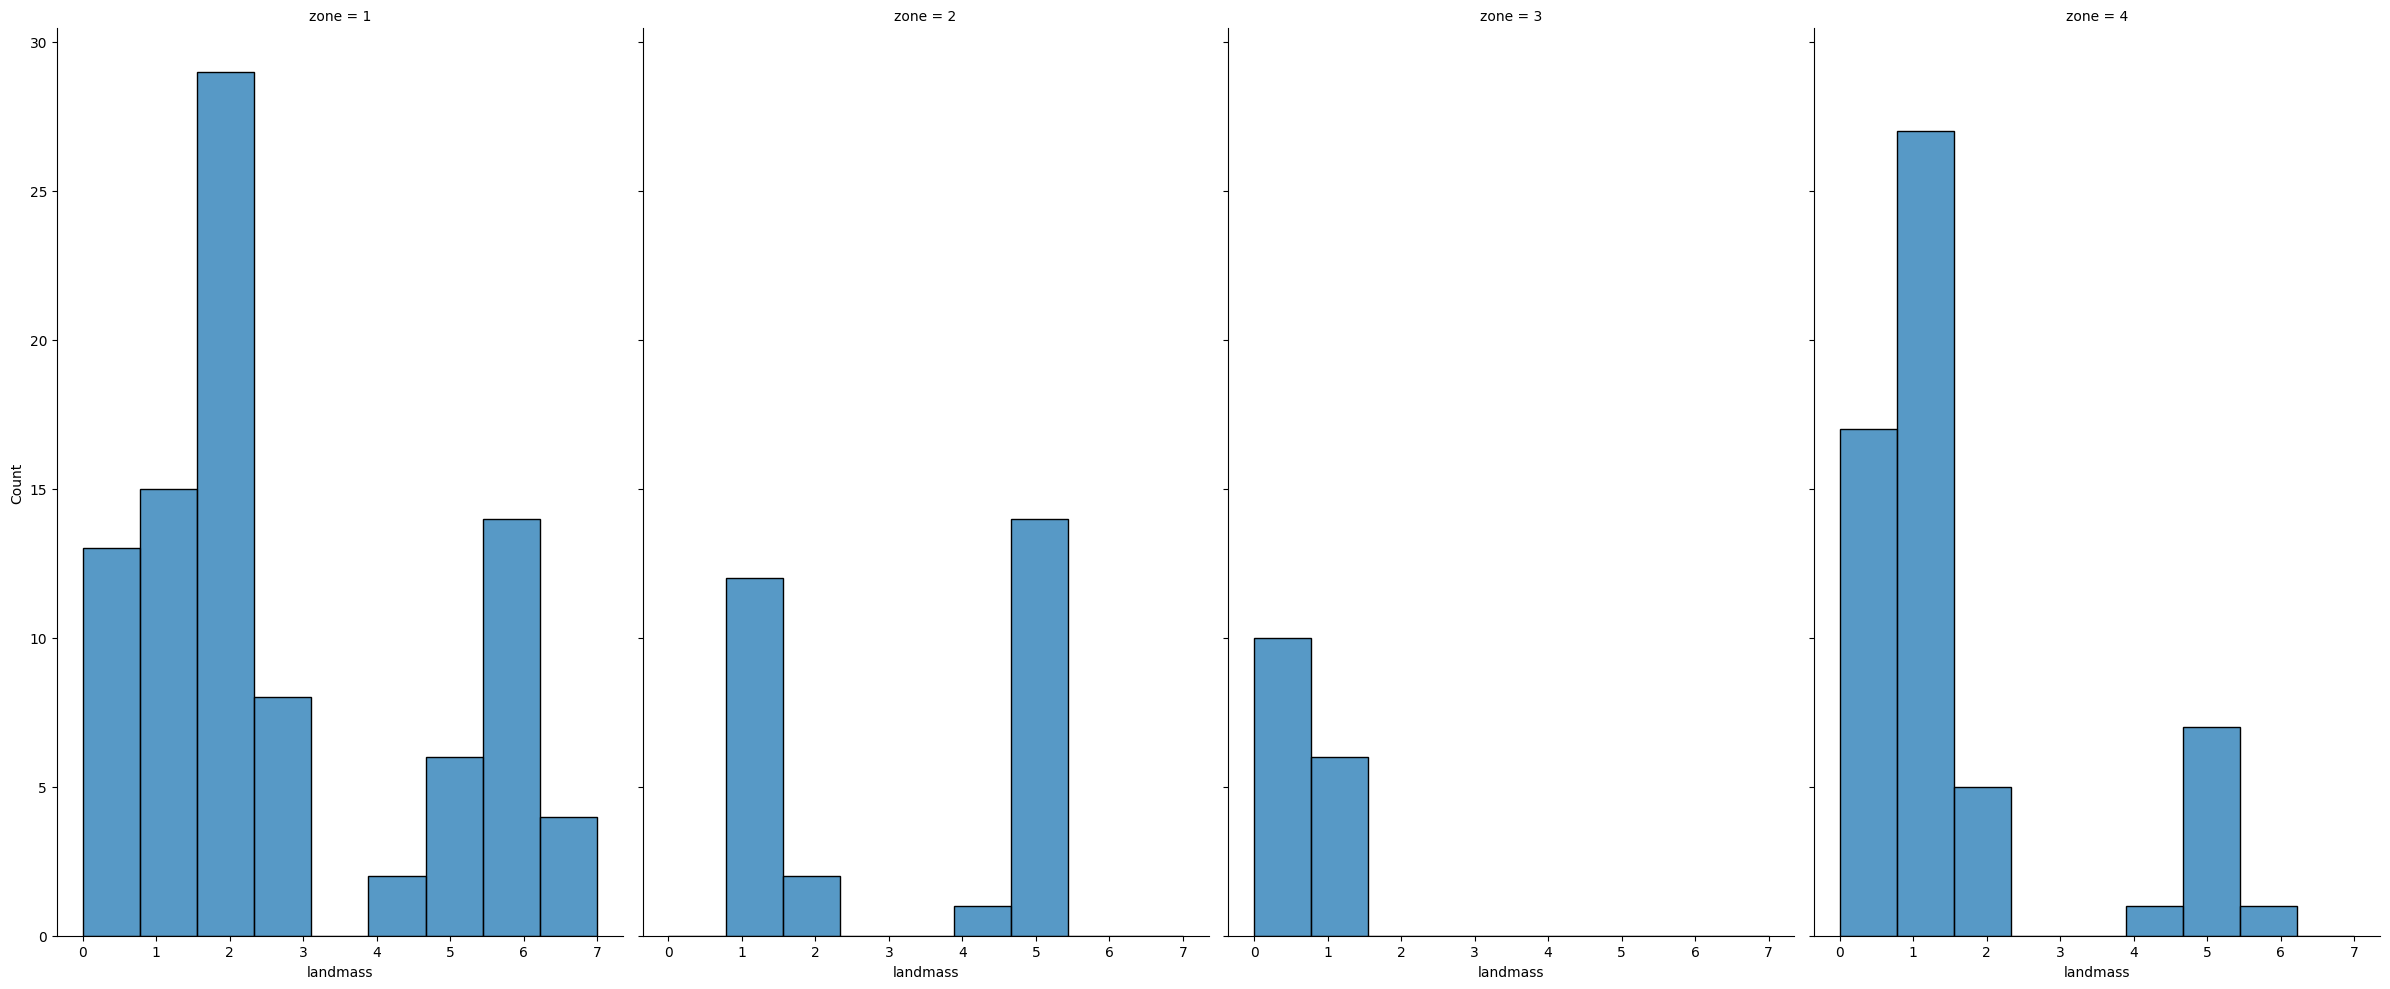

In [14]:
# 2.3. Count of flag for each religion 
g = sns.displot(
    data=df, x="religion", col='zone', # hue="icon", 
    kind="hist", height=10, aspect=.6,
)
g.set_axis_labels("landmass")

In [15]:
# Step 3. Split dataset
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Name', 'religion'])
y = df['religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(y_train), len(y_test)

(135, 59)

In [16]:
# Step 4-5. Fit model, calculate predictions and output metrics.
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

def get_scores(X_tr, y_tr, X_v, y_v, model=None):
    if model == None:
        model = LogisticRegression()
    
    model.fit(X_tr, y_tr)
    print(classification_report(np.array(y_v), model.predict(X_v)))

model = DecisionTreeClassifier(random_state=42)
get_scores(X_train, y_train, X_test, y_test, model=model)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.74      0.64      0.68        22
           2       0.40      0.57      0.47         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.57      0.40      0.47        10
           6       0.33      0.60      0.43         5

    accuracy                           0.58        59
   macro avg       0.40      0.43      0.41        59
weighted avg       0.59      0.58      0.57        59



<b>Baseline accuracy: 58%</b>

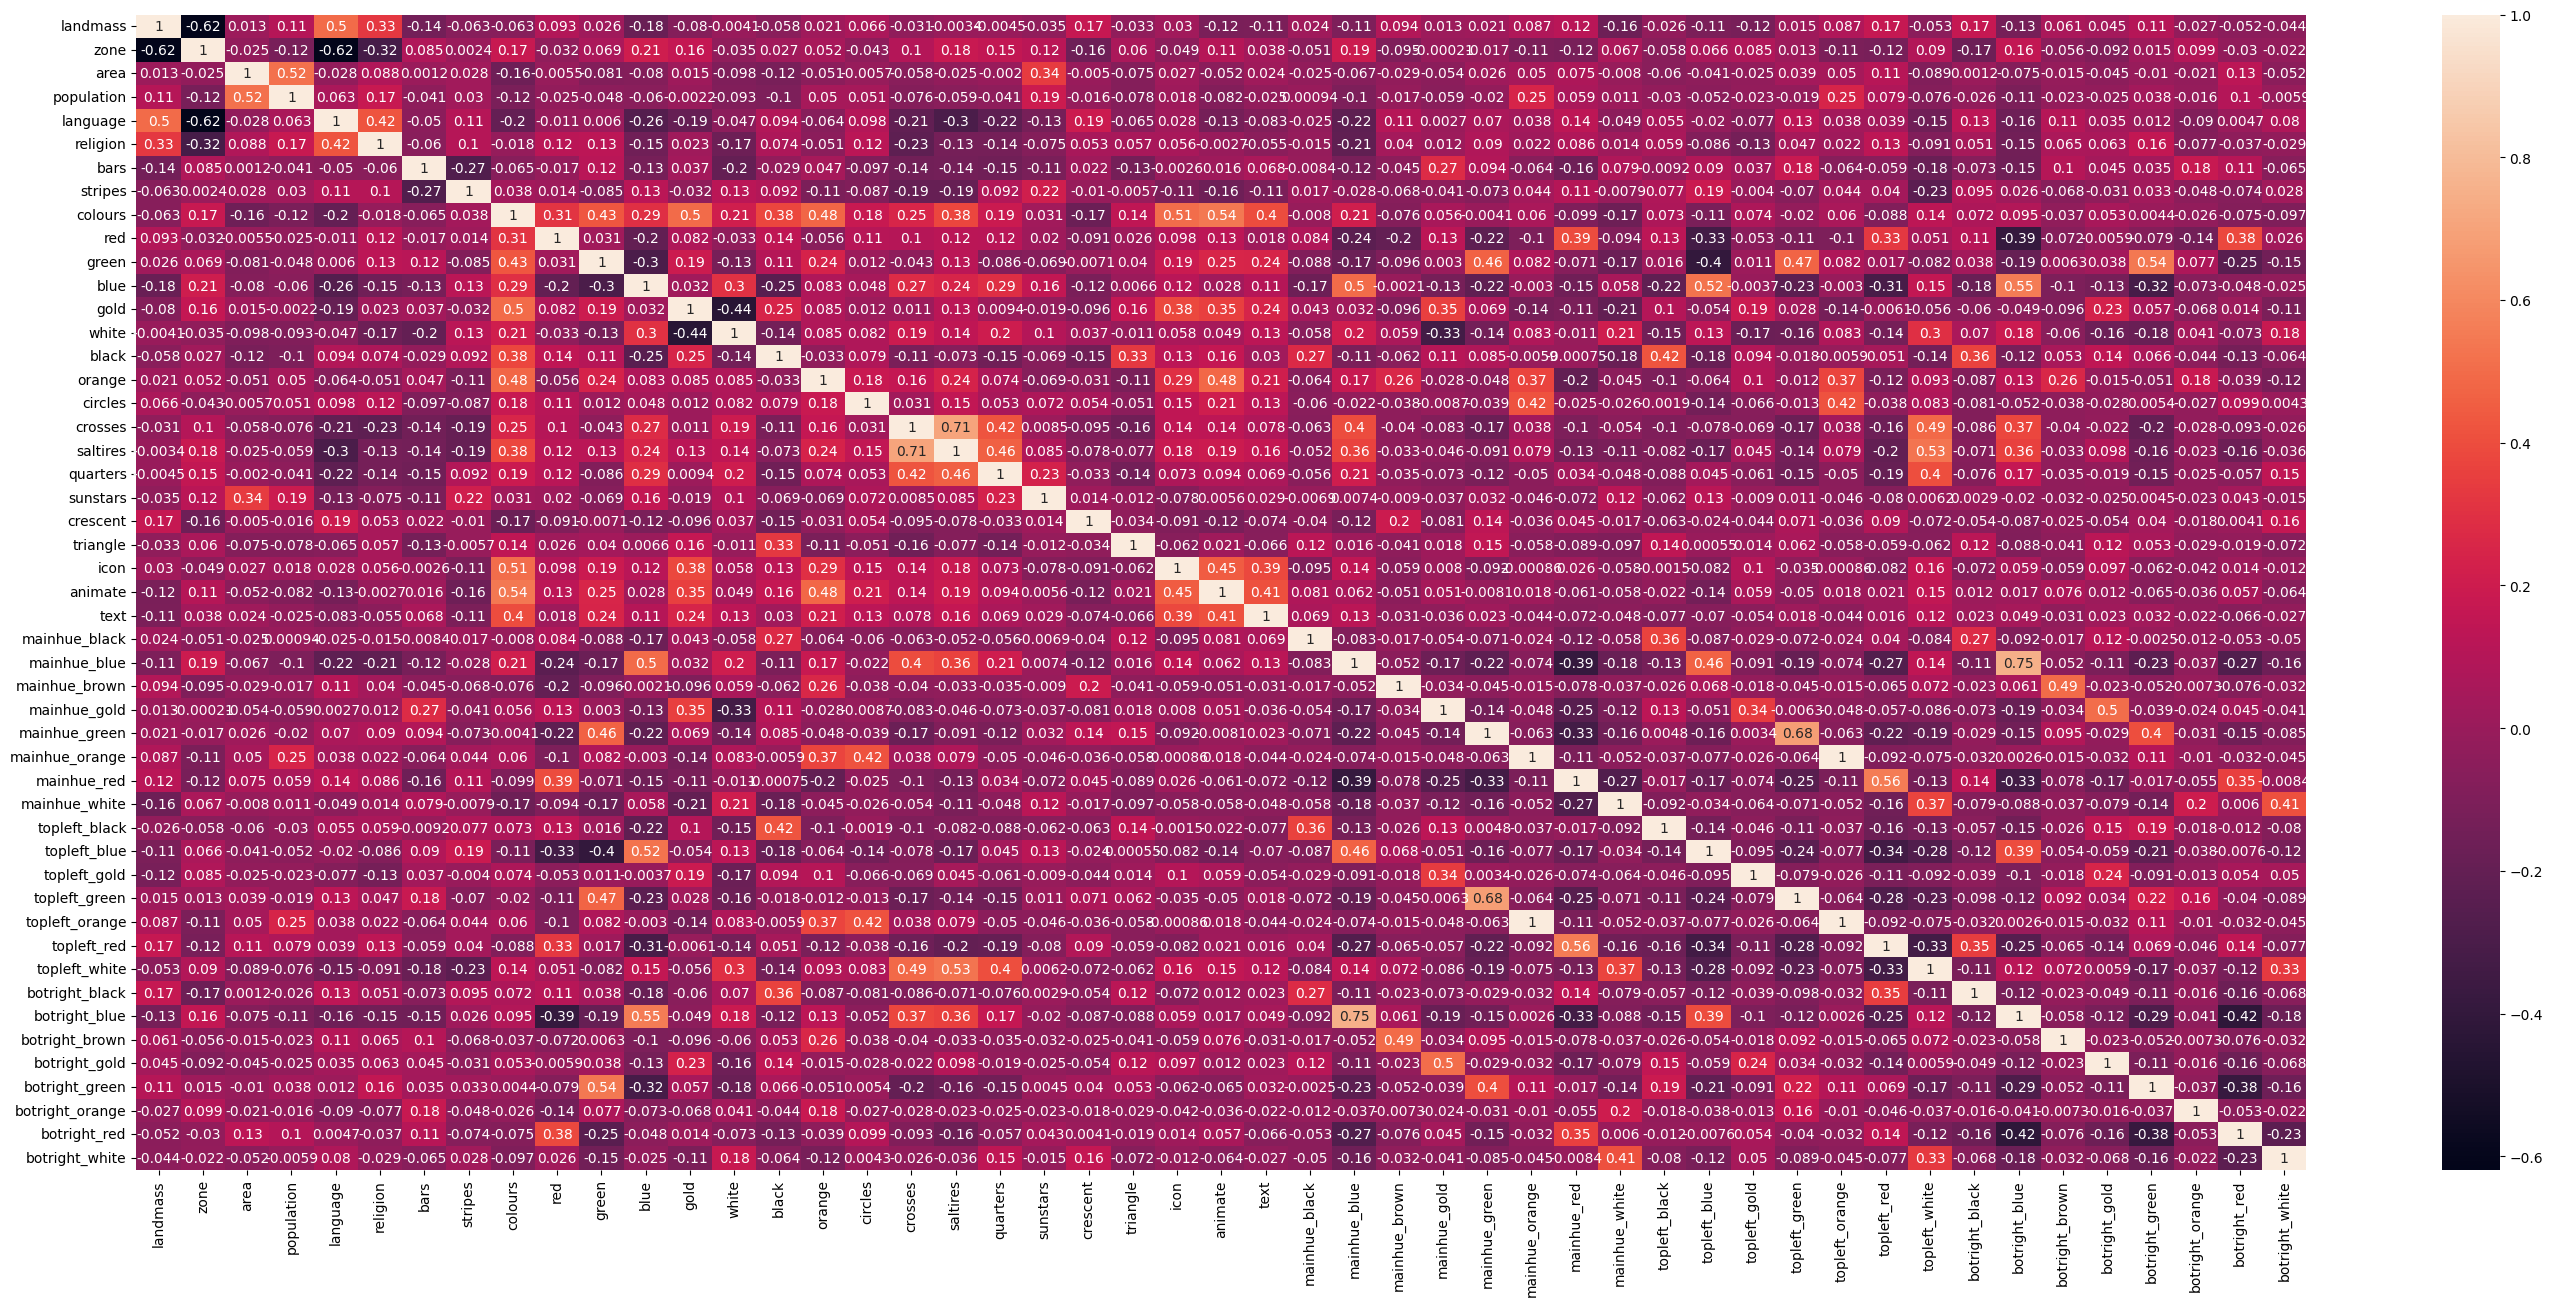

In [17]:
# Step 6. Calculate correlation.
corr = df.drop(columns=['Name']).corr()

plt.figure(figsize=(35,15))
sns.heatmap(corr,annot=True)
plt.show()

- Religion has a low correlation with colours(2%), gold(2%), orange(5%), animate(0.2%), mainhue_black(2%), mainhue_brown(4%), mainhue_orange(2%), mainhue_white(1%), botright_red(4%), botright_white(3%), bars(6%), black(7%), sunstars(8%), crescent(5%), triangle(6%), icon(6%), text(6%), mainhue_gold(1%), mainhue_green(9%), mainhue_red(9%), topleft_black(6%),  topleft_blue(9%), topleft_green(5%), topleft_white(9%), botright_brown(6%), topleft_gold(13%), botright_orange(8%), botright_black(5%)
- crosses and saltires have a correlation 70%. Delete saltires.
- mainhue_orange and topleft_orange have a correlation 100%. Delete topleft_orange.
- mainhue_blue and botright_blue have a high correlation 70%. Delete botright_blue.
- mainhue_green and topleft_green have a high correlation 68%. Delete mainhue_green.

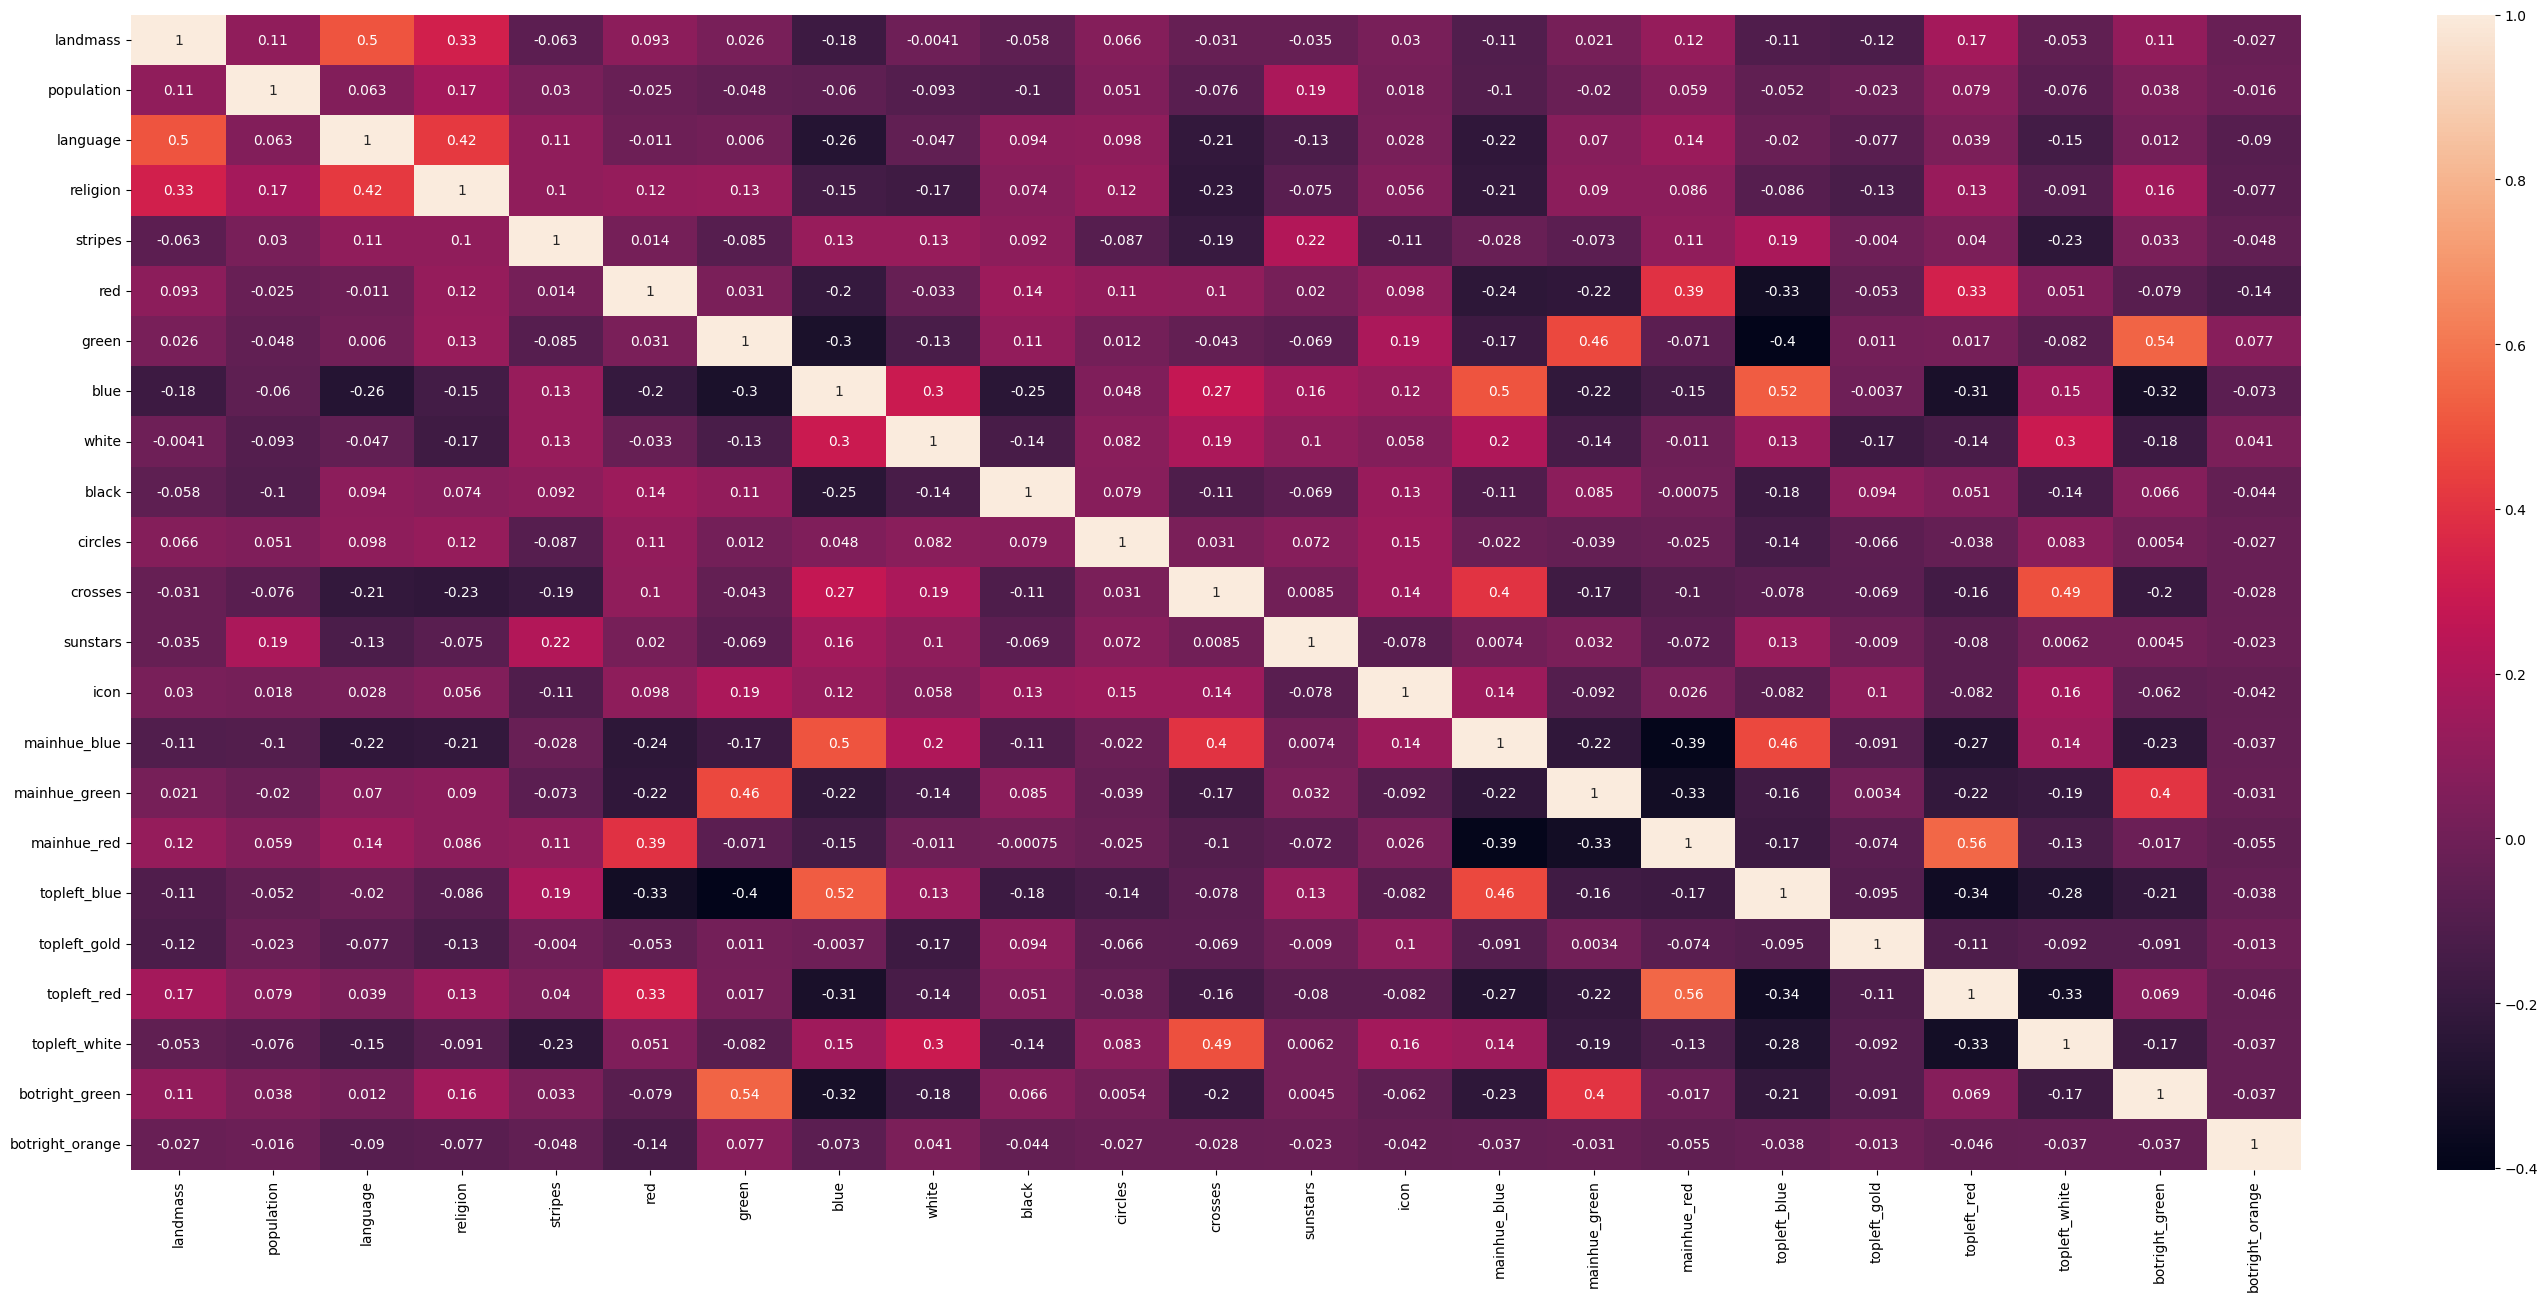

In [18]:
# Manual reducing the amount of features (That also step 12).
drop_columns = [
    'colours', 
    'gold', 
    'orange', 
    'animate', 
    'zone',

    'bars', #6%
#    'black', #7% 
     'saltires',  # crosses and saltires have a correlation 70%
#    'sunstars',  #8%
     'crescent',  #5%
    'triangle',  #6%
#    'icon',      #6% 
    'text',      #6%
    
    'quarters', 
    'area', 
    
     'mainhue_gold', 
#    'mainhue_green',  #9% 
#     'mainhue_red',    #9% 
     'mainhue_black', 
     'mainhue_brown', 
     'mainhue_orange', 
     'mainhue_white', 
    
#    'topleft_blue',   #9%
     'topleft_green',  #5% + mainhue_green and topleft_green have a high correlation 68% 
#    'topleft_gold',   #13%
     'topleft_orange', #2% + mainhue_orange and topleft_orange have a correlation 100%
#     'topleft_white',  #9%
     'topleft_black',  #6%
    
    'botright_blue',     #15% + mainhue_blue and botright_blue have a high correlation 70%
     'botright_black',   #5%
    'botright_gold',    #6%
    'botright_brown',   #6%
#    'botright_orange',  #8% 
     'botright_red',     #4%
     'botright_white',   #3%

]
df = df.drop(columns=drop_columns)
X_train = X_train.drop(columns=drop_columns)
X_test = X_test.drop(columns=drop_columns)

corr = df.drop(columns=['Name']).corr()

#Draw corr matrix again
plt.figure(figsize=(35,15))
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
# Calculate metric scores again
get_scores(X_train, y_train, X_test, y_test, model=model)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.79      0.68      0.73        22
           2       0.36      0.71      0.48         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.62      0.50      0.56        10
           6       0.33      0.20      0.25         5

    accuracy                           0.59        59
   macro avg       0.41      0.42      0.40        59
weighted avg       0.61      0.59      0.59        59



<b>The deleting high and low correlations features increases the accuracy to 59% (on 1%)</b>

In [20]:
# Step 7. Emissions examining.
df.columns

Index(['Name', 'landmass', 'population', 'language', 'religion', 'stripes',
       'red', 'green', 'blue', 'white', 'black', 'circles', 'crosses',
       'sunstars', 'icon', 'mainhue_blue', 'mainhue_green', 'mainhue_red',
       'topleft_blue', 'topleft_gold', 'topleft_red', 'topleft_white',
       'botright_green', 'botright_orange'],
      dtype='object')

<Axes: xlabel='population'>

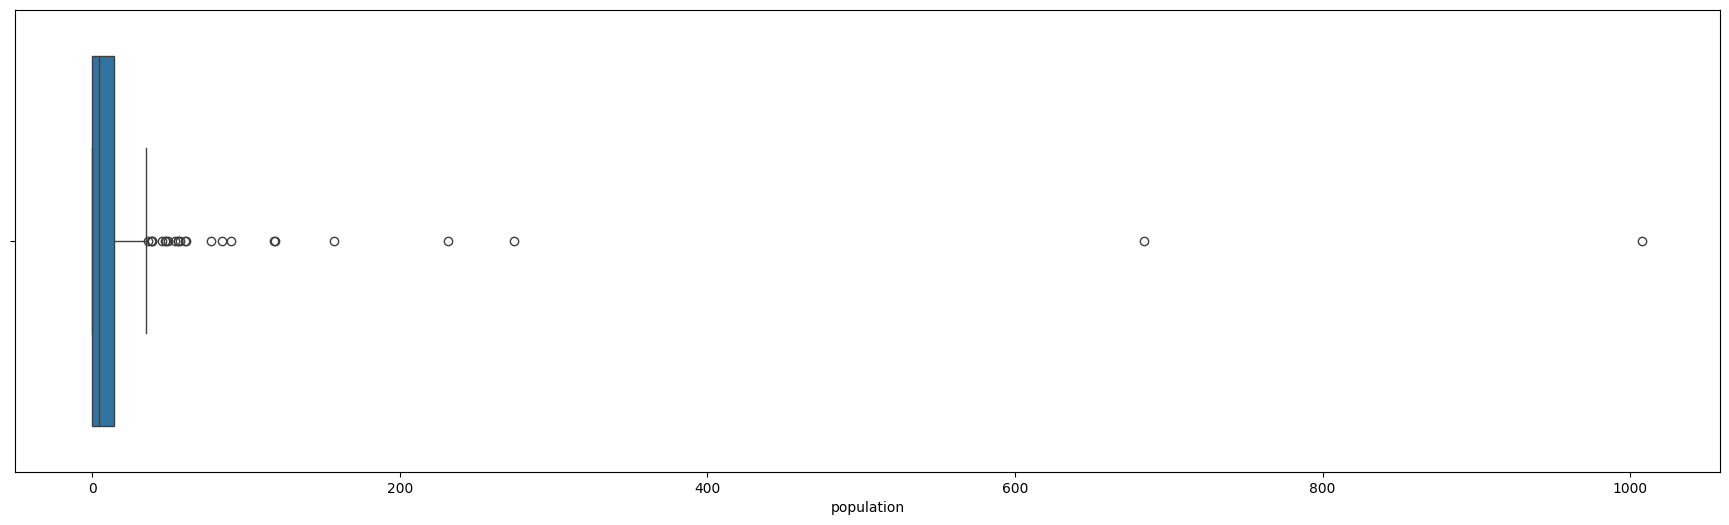

In [21]:
sns.boxplot(x=df["population"])  # population < 600 

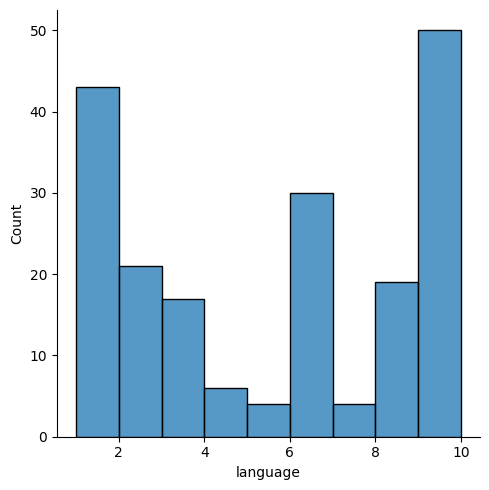

In [22]:
sns.displot(x=df["language"])  #  df["language"] = np.log(df["language"])

<Axes: xlabel='stripes'>

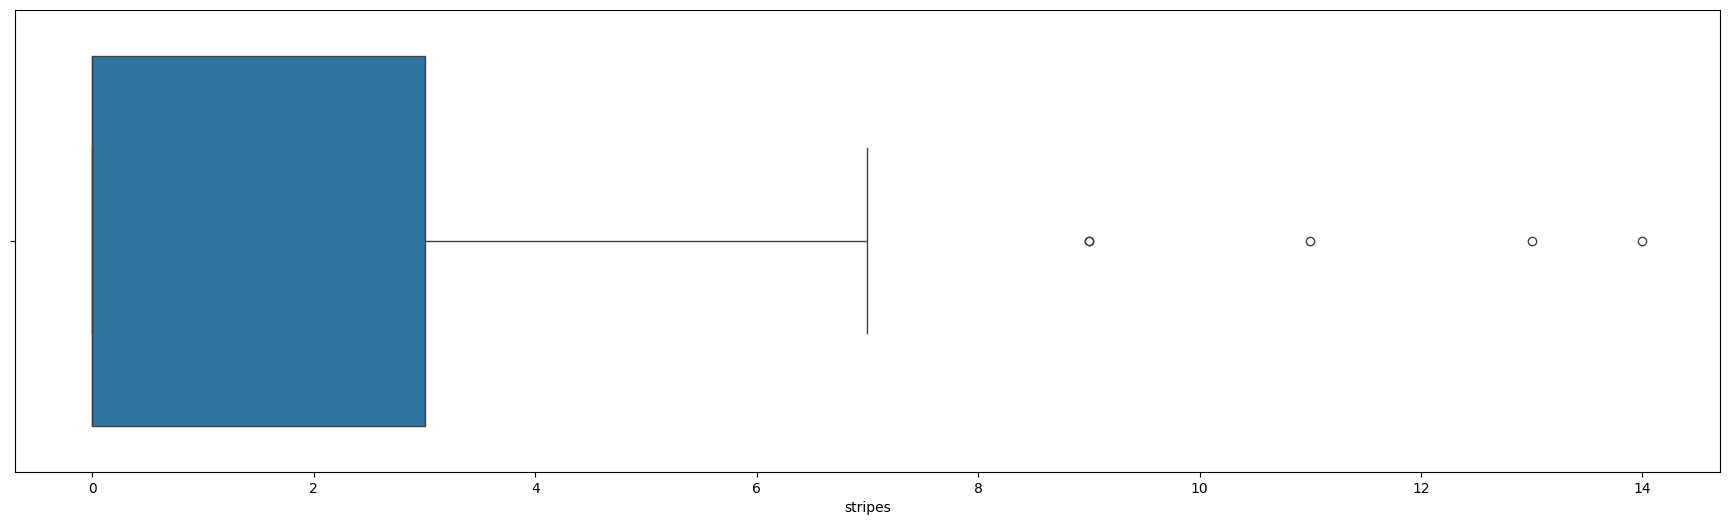

In [23]:
sns.boxplot(x=df["stripes"])  # df = df[.stripes < 8]

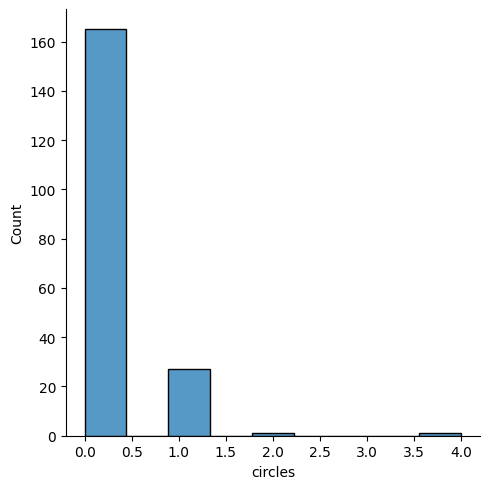

In [24]:
sns.displot(x=df["circles"])  #circles delete 2 and 4:  df = df[df.circles < 2]

<Axes: xlabel='crosses'>

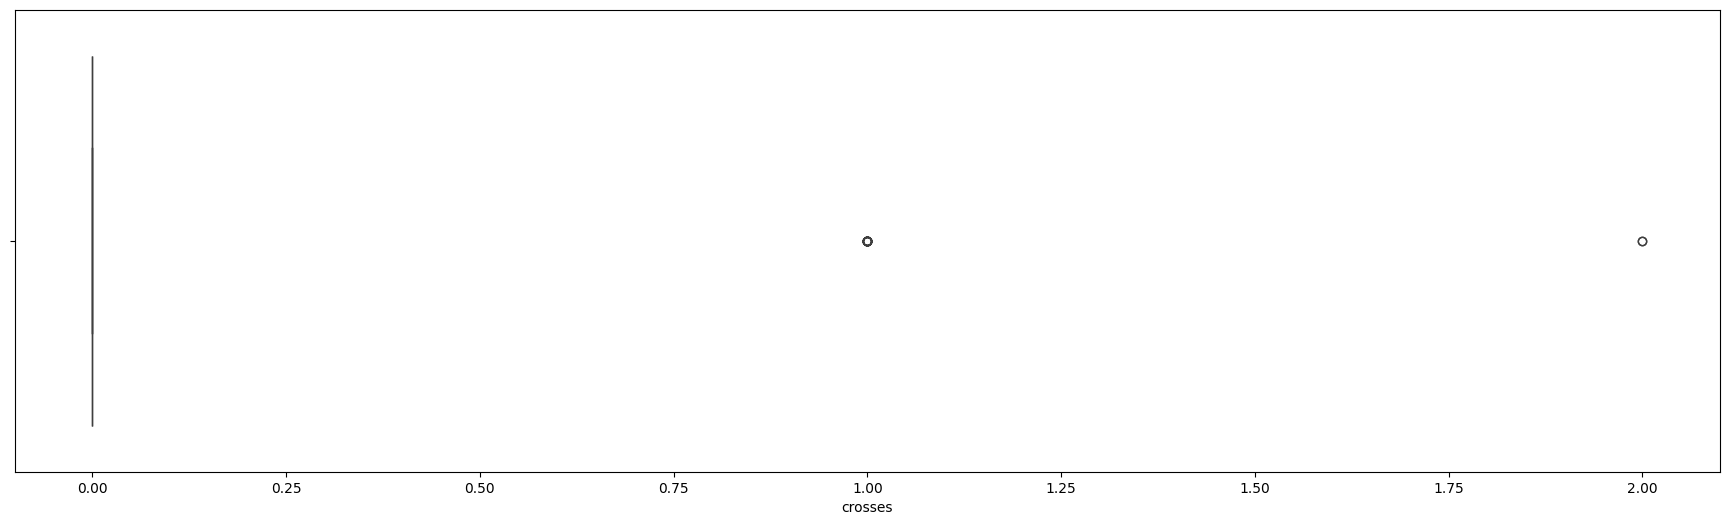

In [25]:
sns.boxplot(x=df["crosses"])  #crosses delete 2:  df = df[df.crosses < 2]

<Axes: xlabel='sunstars'>

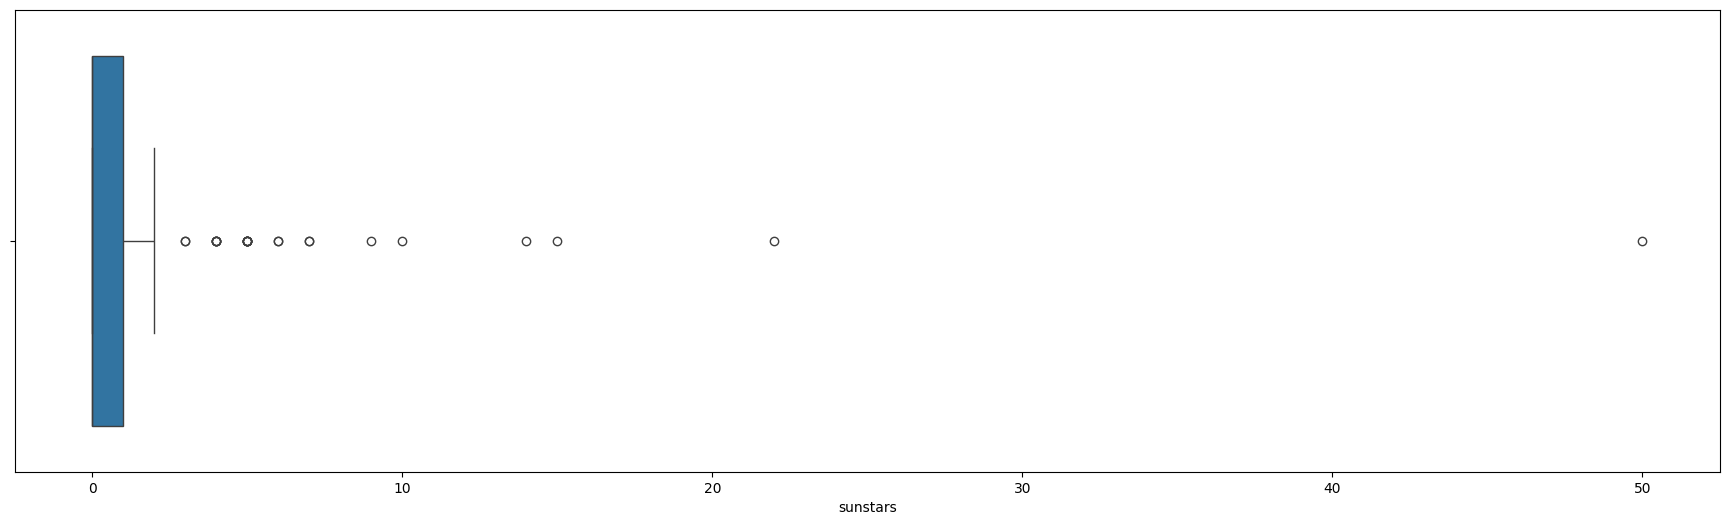

In [26]:
sns.boxplot(x=df["sunstars"])  #sunstars < 5:  df = df[df.sunstars < 5]

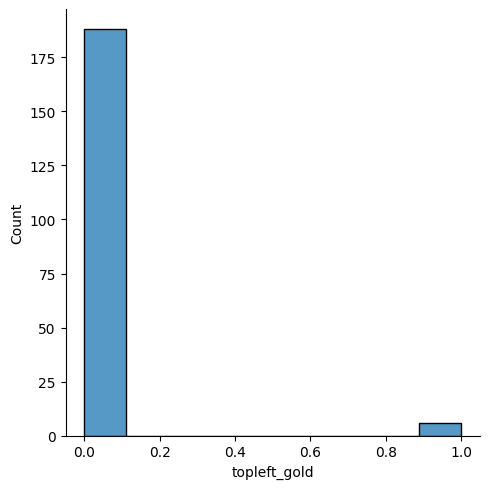

In [27]:
sns.displot(x=df["topleft_gold"])  #delete 1:  df = df[df.topleft_gold == 0.0] 

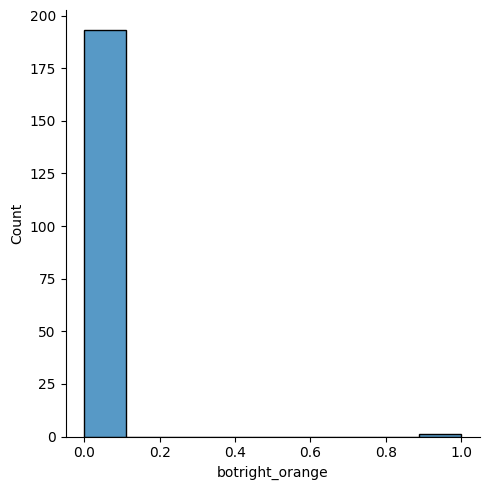

In [28]:
sns.displot(x=df["botright_orange"])  # delete 1:   df = df[df.botright_orange == 0.0] 

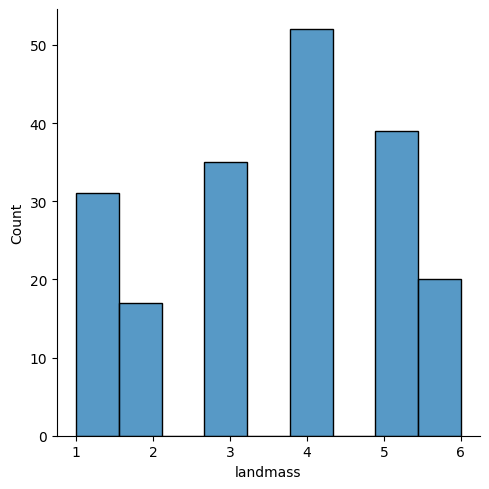

In [29]:
sns.displot(x=df["landmass"])  # log:  df["landmass"] = np.log(df["landmass"])

In [30]:
df_old = df.copy()

first_len = len(df)
df = df[(df.population <= 600)] 
df = df[df.stripes < 8]
df = df[df.circles < 2] 
df = df[df.crosses < 2]
df = df[df.sunstars < 10]
df = df[df.topleft_gold == 0.0] 
df = df[df.botright_orange == 0.0] 
second_len = len(df)
print(f"Delete {round(1 - second_len/first_len, 3)*100}% of data")

Delete 11.3% of data


In [31]:
X = df.drop(columns=['Name', 'religion'])
y = df['religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

get_scores(X_train, y_train, X_test, y_test, model=model)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        24
           1       0.59      0.73      0.65        37
           2       0.70      0.58      0.64        24
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         2
           5       0.41      0.45      0.43        20
           6       0.17      0.25      0.20         8
           7       0.00      0.00      0.00         3

    accuracy                           0.54       121
   macro avg       0.45      0.36      0.38       121
weighted avg       0.56      0.54      0.54       121



<b>Experiments with the deleting of emissions reduces the accuracy</b>

In [32]:
# log data
df = df_old.copy()
df["language"] = np.log(df["language"])
df["landmass"] = np.log(df["landmass"])

In [33]:
X = df.drop(columns=['Name', 'religion'])
y = df['religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

get_scores(X_train, y_train, X_test, y_test, model=model)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.79      0.68      0.73        22
           2       0.36      0.71      0.48         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.62      0.50      0.56        10
           6       0.33      0.20      0.25         5

    accuracy                           0.59        59
   macro avg       0.41      0.42      0.40        59
weighted avg       0.61      0.59      0.59        59



<b>The log of "language" doesn't increase the accuracy.</b>

In [35]:
# Step 8-9. Normilizing 
from sklearn.preprocessing import StandardScaler # Z - Standartization 

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [36]:
get_scores(X_train_norm, y_train, X_test_norm, y_test, model=model)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.79      0.68      0.73        22
           2       0.36      0.71      0.48         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.62      0.50      0.56        10
           6       0.33      0.20      0.25         5

    accuracy                           0.59        59
   macro avg       0.41      0.42      0.40        59
weighted avg       0.61      0.59      0.59        59



<b>StandardScaler doesn't improve accuracy.</b>

In [49]:
# Step 10. Class Balance
df.religion.value_counts()

religion
1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: count, dtype: int64

In [57]:
# Undersampling, using TomekLink
from imblearn.under_sampling import TomekLinks
 
tl = TomekLinks(sampling_strategy=[1, 2, 0]) #'majority'
X_tl, y_tl = tl.fit_resample(X_train, y_train)

get_scores(X_tl, y_tl, X_test, y_test, model=model)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.71      0.55      0.62        22
           2       0.45      0.71      0.56         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.50      0.40      0.44        10
           6       0.38      0.60      0.46         5
           7       0.00      0.00      0.00         0

    accuracy                           0.54        59
   macro avg       0.35      0.37      0.35        59
weighted avg       0.57      0.54      0.55        59



In [58]:
y_train.value_counts(), y_tl.value_counts()

(religion
 1    38
 0    29
 2    29
 5    17
 6    10
 3     6
 7     4
 4     2
 Name: count, dtype: int64,
 religion
 1    33
 2    18
 5    17
 0    16
 6    10
 3     6
 7     4
 4     2
 Name: count, dtype: int64)

In [59]:
# Oversampling, using SMOTE
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

smote = SMOTE(sampling_strategy={4: 10, 7: 10, 3: 10, 6: 18},k_neighbors=1, random_state=42)
X_sm, y_sm = smote.fit_resample(X_tl, y_tl)

get_scores(X_sm, y_sm, X_test, y_test, model=model)

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.81      0.59      0.68        22
           2       0.42      0.71      0.53         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.64      0.70      0.67        10
           6       0.30      0.60      0.40         5
           7       0.00      0.00      0.00         0

    accuracy                           0.58        59
   macro avg       0.38      0.39      0.37        59
weighted avg       0.65      0.58      0.59        59



In [60]:
y_train.value_counts(), y_sm.value_counts()

(religion
 1    38
 0    29
 2    29
 5    17
 6    10
 3     6
 7     4
 4     2
 Name: count, dtype: int64,
 religion
 1    33
 2    18
 6    18
 5    17
 0    16
 7    10
 3    10
 4    10
 Name: count, dtype: int64)

<b> Classe's balancing reduces the accuracy</b>

In [83]:
# Step 11. Reducing the space of features

## 11.1. NCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis

pca = NeighborhoodComponentsAnalysis(n_components=10)
X_tr = pca.fit_transform(X_train, y_train)

X_val = pca.transform(X_test)

print(f'Shape before: {X_train.shape}; shape after {X_tr.shape}')

get_scores(X_tr, y_train, X_val, y_test, model=model)

Shape before: (135, 22); shape after (135, 10)
              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.58      0.50      0.54        22
           2       0.29      0.57      0.38         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.67      0.20      0.31        10
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0

    accuracy                           0.42        59
   macro avg       0.25      0.25      0.22        59
weighted avg       0.45      0.42      0.40        59



In [104]:
## 11.2. 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC # Support Vector Classification

estimator = SVC(kernel="linear") 
selector = RFE(estimator, n_features_to_select=6, step=1) # n_features_to_select - Количество фичей  для выбора
X_tr = selector.fit_transform(X_train, y_train)

X_val = selector.transform(X_test)

print(f'Shape before: {X_train.shape}; shape after {X_tr.shape}')

get_scores(X_tr, y_train, X_val, y_test, model=model)

X_train = X_tr
X_test = X_val

Shape before: (135, 22); shape after (135, 6)
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.74      0.77      0.76        22
           2       0.55      0.86      0.67         7
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         2
           5       0.83      0.50      0.62        10
           6       1.00      0.40      0.57         5

    accuracy                           0.69        59
   macro avg       0.62      0.62      0.58        59
weighted avg       0.71      0.69      0.68        59



<b> The reducing the space of features improves the accuracy to 69% (on 11% from baseline accuracy).</b>

In [105]:
# Step 12. Manual feature selecting (see step 6)

In [109]:
# Step 13. Optimizing hyperparameters hyperopt
from hyperopt import hp, rand, fmin, tpe, Trials, STATUS_OK
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# values of parameters 

#n_estimators = list(range(50, 500, 50))
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth = list(range(5, 100, 5))
min_samples_split = list(range(2, 22, 2))
min_samples_leaf = list(range(1, 10, 1))
max_features = ['sqrt', 'log2', None]


# Creating the space of parameters
search_space = [
    #hp.choice(label='n_estimators', options=n_estimators),
    hp.choice(label='criterion', options=criterion),
    hp.choice(label='splitter', options=splitter),
    hp.choice(label='max_depth', options=max_depth),    
    hp.choice(label='min_samples_split', options=min_samples_split), 
    hp.choice(label='min_samples_leaf', options=min_samples_leaf), 
    hp.choice(label='max_features', options=max_features), 
]


# Special function 
def objective(params):
    #rfc = RandomForestClassifier(random_state=42, n_estimators=params[0], criterion=params[1], max_depth=params[2], min_samples_split=params[3], min_samples_leaf=params[4], max_features=params[5])
    dtc = DecisionTreeClassifier(random_state=42, criterion=params[0], splitter=params[1], max_depth=params[2], min_samples_split=params[3], min_samples_leaf=params[4], max_features=params[5])
    scores = cross_val_score(rfc, X, y, cv=10, scoring="accuracy")
    return -scores.mean()

#tpe.suggest - method Bayesian Optimisation Tree of Parzen Estimators (TPE)
tpe_algo = tpe.suggest
# Create two trials objects (Trials - object for storing a history)
tpe_trials = Trials()  

#Start a process of searhing the best parameters of model
tpe_best = fmin(fn=objective, space=search_space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=50)

print(tpe_best)

best_parameters = [
    #n_estimators[tpe_best.get('n_estimators')],
    criterion[tpe_best.get('criterion')],
    splitter[tpe_best.get('splitter')],
    max_depth[tpe_best.get('max_depth')],
    min_samples_split[tpe_best.get('min_samples_split')],
    min_samples_leaf[tpe_best.get('min_samples_leaf')],
    max_features[tpe_best.get('max_features')],
]

#rfc = RandomForestClassifier(random_state=42, n_estimators=best_parameters[0], criterion=best_parameters[1], max_depth=best_parameters[2], min_samples_split=best_parameters[3], min_samples_leaf=best_parameters[4], max_features=best_parameters[5])
dtc = DecisionTreeClassifier(random_state=42, criterion=best_parameters[0], splitter=best_parameters[1], max_depth=best_parameters[2], min_samples_split=best_parameters[3], min_samples_leaf=best_parameters[4], max_features=best_parameters[5])
get_scores(X_train, y_train, X_test, y_test, model=rfc)

100%|██████████| 50/50 [03:36<00:00,  4.32s/trial, best loss: -0.6810526315789472]
{'criterion': 1, 'max_depth': 7, 'max_features': 1, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 0}
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.81      0.77      0.79        22
           2       0.50      0.86      0.63         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.88      0.70      0.78        10
           6       0.00      0.00      0.00         5

    accuracy                           0.68        59
   macro avg       0.41      0.46      0.42        59
weighted avg       0.63      0.68      0.65        59



<b>Bayesian Optimization loses 1% of the accuracy.</b>

<b></b>

In [128]:
# Step 14. Stacking
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Создаем стэккинг и обучаем его на наших данных 
Classifier = StackingClassifier(
    [
        ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
        ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
        ('DecisionTreeClassifier', dtc)
    ], SVC()
)

get_scores(X_train, y_train, X_test, y_test, model=Classifier)

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        11
           1       0.82      0.82      0.82        22
           2       0.60      0.86      0.71         7
           3       0.25      0.50      0.33         2
           4       0.00      0.00      0.00         2
           5       0.75      0.60      0.67        10
           6       0.00      0.00      0.00         5

    accuracy                           0.69        59
   macro avg       0.44      0.53      0.47        59
weighted avg       0.64      0.69      0.66        59



<b>Stacking returns the accuracy 69%</b>

<b></b>

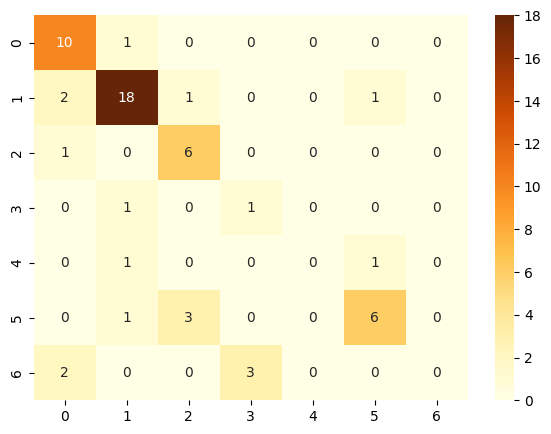

In [129]:
# Step 15. Construct Confuse Matrix
from sklearn.metrics import confusion_matrix
pred = Classifier.predict(X_test)
c_m = confusion_matrix(y_test, pred)
plt.figure(figsize=(7,5))
sns.heatmap(c_m,annot=True, cmap="YlOrBr")
plt.show()

In [133]:
# Step 16. Something from myself: PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2,   
                include_bias=False,    
                interaction_only=True  
)
X_train_poly = polynomial_features.fit_transform(X_train) 
X_test_poly = polynomial_features.transform(X_test) 

get_scores(X_train_poly, y_train, X_test_poly, y_test, model=Classifier)

              precision    recall  f1-score   support

           0       0.56      0.91      0.69        11
           1       0.84      0.73      0.78        22
           2       0.55      0.86      0.67         7
           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00         2
           5       0.75      0.60      0.67        10
           6       0.00      0.00      0.00         5

    accuracy                           0.66        59
   macro avg       0.43      0.51      0.46        59
weighted avg       0.62      0.66      0.63        59



<b>PolynomialFeatures reduces the accuracy on 3% (66%)</b>

<b>Step 17. Conclusion</b>

|                     |   accuracy   |
|---------------------|--------------|
|Baseline             |    58%       |
|Correlation          |    59%       |
|Emissions            |    54%       |
|Logarithm            |    59%       |
|StandardScaler       |    59%       |
|Over&Undersampling   |    58%       |
|Feature Selection    |    69%       |
|Bayesian Optimization|    68%       |
|Stacking             |    69%       |
|PolynomialFeatures   |    66%       |